In [75]:
from random import randint
from typing import Callable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [76]:
def function(x: float) -> float:
    return float(np.sin(x / 10) * np.sin(x / 200))

In [77]:
def algorytm(x: float, y: float, rozrzut: float, wsp_przyrostu: float, l_iteracji: int, function: Callable) -> tuple:
    x_points = [x]
    y_points = [y]
    dispersions = [rozrzut]

    for l in range(l_iteracji):
        random_number = randint(int(-rozrzut), int(rozrzut))
        xpot = x + random_number
        if xpot < 0:
            xpot = 0
        if xpot > 100:
            xpot = 100
        ypot = function(xpot)

        if ypot >= y:
            x = xpot
            y = ypot
            x_points.append(x)
            y_points.append(y)
            rozrzut *= wsp_przyrostu
        if ypot < y:
            rozrzut /= wsp_przyrostu

        dispersions.append(rozrzut)
    return x_points, y_points, dispersions

# Raport dot. alg. 1+1
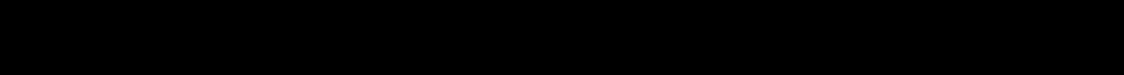

In [78]:
rozrzut = 1.0
wsp_przyrostu = 1.3
l_iteracji = 100
x = randint(90, 100)
y = function(x)
x_points, y_points, dispersions = algorytm(x, y, rozrzut, wsp_przyrostu, l_iteracji, function)

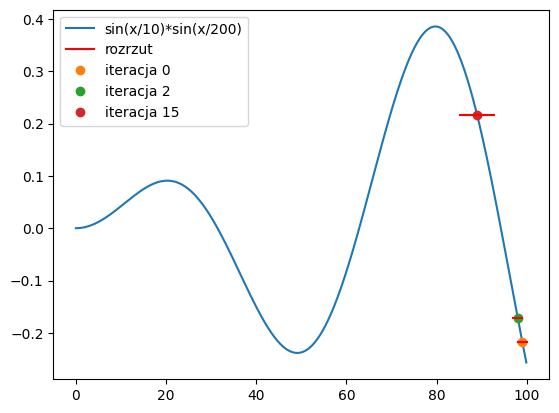

In [79]:
x_range = np.arange(0, 100, 0.1)
y = np.sin(x_range / 10) * np.sin(x_range / 200)
idx = np.array([0, 2, 15])
x_points = np.array(x_points)
y_points = np.array(y_points)
dispersions = np.array(dispersions)
report_points_x = x_points[idx]
report_points_y = y_points[idx]
report_dispersions = dispersions[idx]

plt.plot(x_range, y, label="sin(x/10)*sin(x/200)")
plt.plot(
    [
        report_points_x[0] - report_dispersions[0],
        report_points_x[0] + report_dispersions[0]
    ],
    [
        report_points_y[0],
        report_points_y[0]
    ],
    color="r",
    label="rozrzut"
)

for iteration, x, y, dispersion in zip(idx, report_points_x, report_points_y, report_dispersions):
    plt.plot(x, y, "o", label=f"iteracja {iteration}")
    plt.plot([x - dispersion, x + dispersion], [y, y], color="r")

plt.legend()
plt.savefig("one-plus-one.png")

In [80]:
raport = pd.DataFrame({"iteracja": idx, " x": report_points_x, "y": report_points_y, "rozrzut": report_dispersions})
raport.set_index("iteracja", inplace=True)
raport.to_excel("one-plus-one.xlsx")
raport

,x,y,rozrzut
iteracja,,,
0,99,-0.217344,1.00000
2,98,-0.172475,1.00000
15,89,0.215668,3.71293
